In [1]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, Sequential, Model, Input
import tensorflow as tf
import numpy as np
np.load.__defaults__=(None, False, True, 'ASCII')

In [2]:
raw_path = '/tf/je_hong/datathon'

In [3]:
X_train = np.load(raw_path+'/X_train_nor.npy')
X_valid = np.load(raw_path+'/X_valid_nor.npy')

In [4]:
train_df = pd.read_csv(raw_path+'/train_info.csv')
valid_df = pd.read_csv(raw_path+'/valid_info.csv')
train_label = train_df['y'].apply(lambda x:1 if x == 'arrhythimia' else 0).tolist()
valid_label =valid_df['y'].apply(lambda x:1 if x == 'arrhythimia' else 0).tolist()
y_train = np.array(train_label)
y_valid = np.array(valid_label)
print('x train shape: ', X_train.shape, '\nx valid shape: ', X_valid.shape, '\ny train shape: ', y_train.shape, '\ny valid shape: ', y_valid.shape)

x train shape:  (38836, 5000, 12) 
x valid shape:  (4859, 5000, 12) 
y train shape:  (38836,) 
y valid shape:  (4859,)


In [5]:
model = tf.keras.models.load_model(raw_path+'/{0}/{1}'.format('exp_best_model', 'best_model.h5'))
pred = model.predict(X_valid)

In [6]:
def plot_roc_curve(fper, tper):
    plt.figure(figsize=(8,8))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
#     plt.show()
    plt.savefig('savefig_default.png')

roc auc value
0.995943124421086 


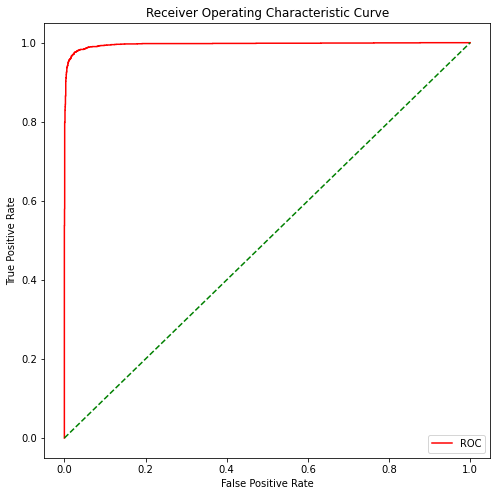

In [7]:
fper, tper, thresholds = roc_curve(y_valid, pred)
plot_roc_curve(fper, tper)
print('roc auc value\n{} '.format(roc_auc_score(y_valid, pred)))